# Кластеризация

# Данные

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:
* geo_comment.xlsx
    * **comment** - комментарий одного или списка жителей к проект
    * **multiplier** - количество авторов комментария (может быть 1, может быть список)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
* geo.xlsx - те же данные, но без текстов комментариев и по 1 голосу на строку (ранее в 1 строке могло быть **multiplier** > 1 голоса)
    * **x, y** - координаты адреса, по которому был дан определённой комментарий
    * **comment_class** - за (1) / против (-1)
    
# Задание

* визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
* аналогично исследовать скопления голосов за и против отдельно
* *подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)*
* найти наиболее активные в голосовании районы *(подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap='gray')*
* для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize'] = (14, 11)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
geoc = pd.read_excel('geo_comment.xlsx')

In [3]:
geoc.tail()

,Unnamed: 0,x,y,comment_class,multiplier,comment
70377,70377,37.454528,55.792331,-1,1,Не поддерживаю. Я против строительства многоэт...
70378,70378,37.384325,55.899068,-1,1,Не поддерживаю. Не нужны отстойники автобусов ...
70379,70379,37.421066,55.848756,1,1,"Не поддерживаю. На мой взгляд, необходимо искл..."
70380,70380,37.448509,55.793065,-1,1,Не поддерживаю: нарушения при строительстве н...
70381,70381,37.451249,55.836620,-1,1,Не поддерживаю. Выступаю против застройки бере...


In [4]:
geoc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70382 entries, 0 to 70381
Data columns (total 6 columns):
Unnamed: 0       70382 non-null int64
x                70382 non-null float64
y                70382 non-null float64
comment_class    70382 non-null int64
multiplier       70382 non-null int64
comment          70382 non-null object
dtypes: float64(2), int64(3), object(1)
memory usage: 3.2+ MB


In [5]:
geo = pd.read_excel('geo.xlsx')
geo.head(3)

,Unnamed: 0,x,y,comment_class
0,0,37.612416,55.777454,-1
1,1,37.612416,55.777454,-1
2,2,37.603298,55.742108,-1


In [6]:
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 4 columns):
Unnamed: 0       108806 non-null int64
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(2)
memory usage: 3.3 MB


In [7]:
x = geo.x
y = geo.y

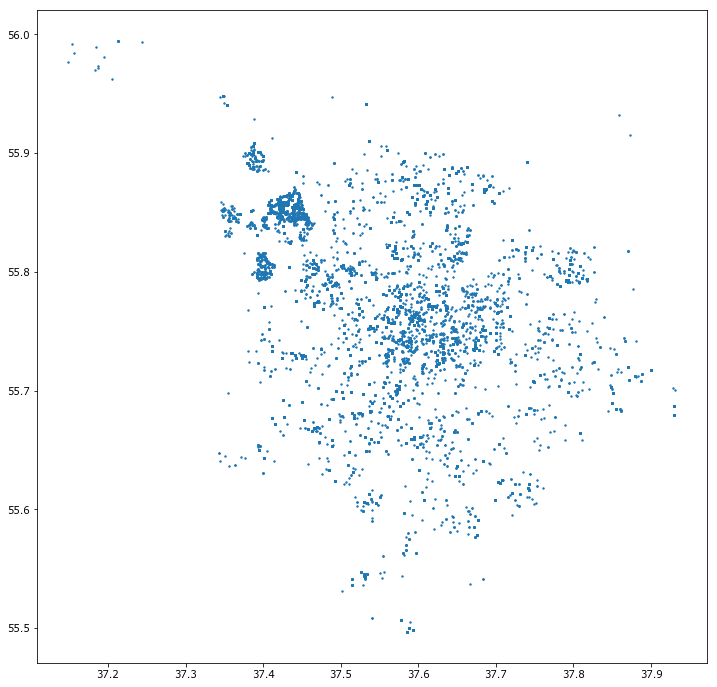

In [8]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x, y, cmap='autumn', s=2)

In [9]:
clf_kmeans = KMeans(n_clusters=8)

In [10]:
coord = geo.loc[:, ['x','y']]

In [11]:
clusters_kmeans = clf_kmeans.fit_predict(coord, ) 
centers = clf_kmeans.cluster_centers_

In [12]:
km= pd.DataFrame(clusters_kmeans)

In [13]:
km[0].value_counts()

5    24251
2    20462
1    17160
3    17073
0    12584
7    10040
6     3728
4     3508
Name: 0, dtype: int64

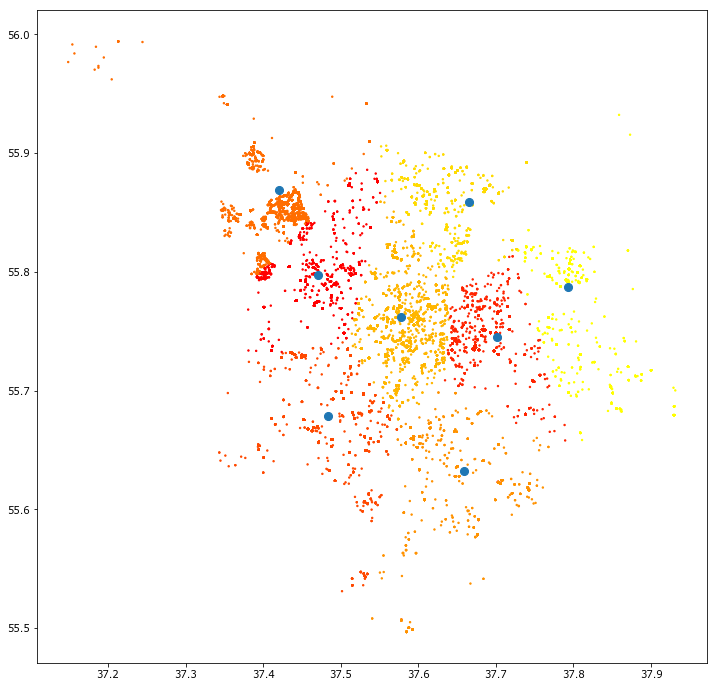

In [14]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x, y, c=clusters_kmeans, cmap='autumn', s=2)
plt.scatter(centers[:, 0], centers[:, 1], s=65)

In [15]:
print("ARI {:.2f}".format(
        adjusted_rand_score(y, clusters_kmeans),
       ))

ARI 0.15


In [16]:
geo_yes = geo[geo.comment_class == 1]

In [17]:
geo_no = geo[geo.comment_class == -1]

In [18]:
coord_yes = geo_yes.loc[:, ['x','y']]
coord_no = geo_no.loc[:, ['x','y']]

In [19]:
x_yes = geo_yes.x
x_no = geo_no.x
y_yes = geo_yes.y
y_no = geo_no.y

In [20]:
clf_kmeans = KMeans(n_clusters=8)

In [21]:
clusters_kmeans = clf_kmeans.fit_predict(coord_yes, ) 

In [22]:
centers = clf_kmeans.cluster_centers_

In [23]:
km= pd.DataFrame(clusters_kmeans)

In [24]:
km[0].value_counts()

6    4423
3    3083
4    1797
5    1324
7    1049
1     738
0     685
2     560
Name: 0, dtype: int64

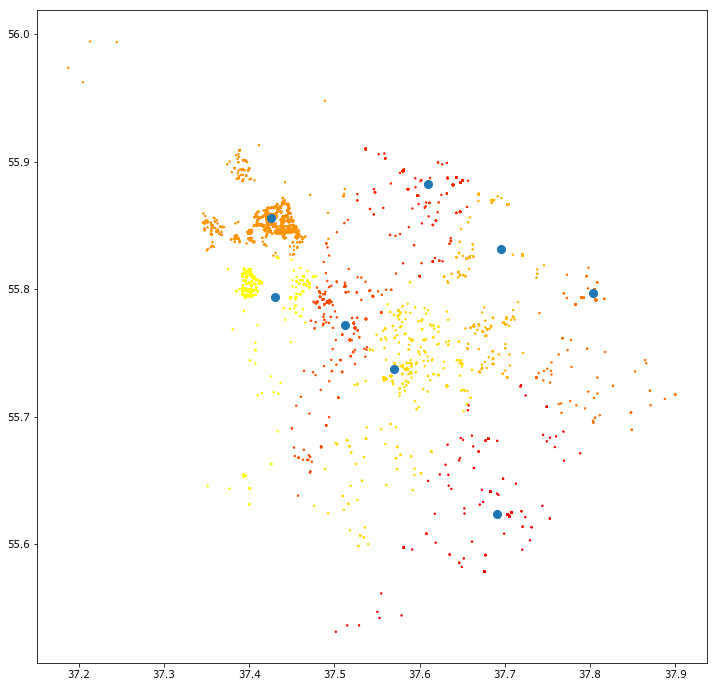

In [25]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x_yes, y_yes, c=clusters_kmeans, cmap='autumn', s=2)
plt.scatter(centers[:, 0], centers[:, 1], s=65)

In [26]:
print("ARI {:.2f}".format(
        adjusted_rand_score(y_yes, clusters_kmeans),
       ))

ARI 0.58


In [27]:
clf_kmeans = KMeans(n_clusters=8)

In [28]:
clusters_kmeans = clf_kmeans.fit_predict(coord_no, ) 
centers = clf_kmeans.cluster_centers_

In [29]:
km= pd.DataFrame(clusters_kmeans)

In [30]:
km[0].value_counts()

0    19101
7    17005
4    15278
2    13879
1     9967
6     7113
3     7023
5     5781
Name: 0, dtype: int64

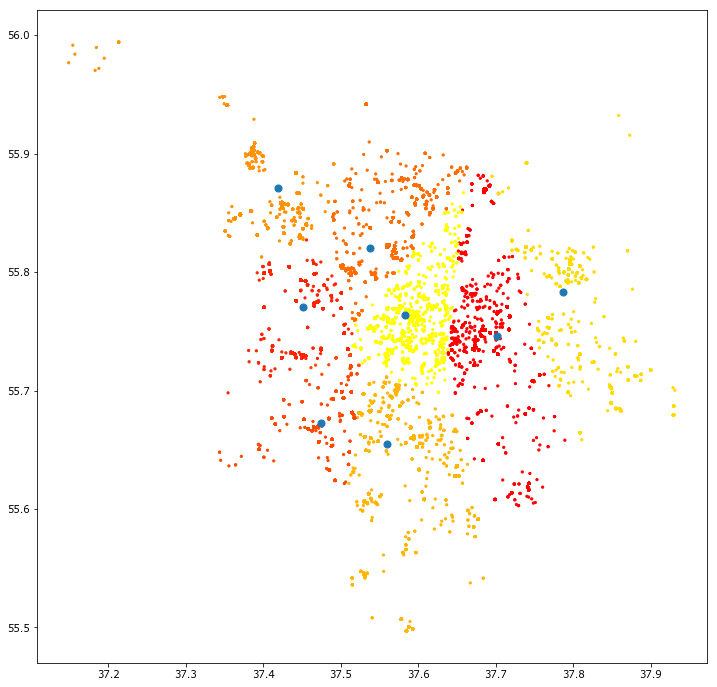

In [33]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x_no, y_no, c=clusters_kmeans, cmap='autumn', s=5)
plt.scatter(centers[:, 0], centers[:, 1], s=50)

In [34]:
print("ARI {:.2f}".format(
        adjusted_rand_score(y_no, clusters_kmeans),
       ))

ARI 0.20


In [35]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(coord, ) 
    k_inertia.append(clf_kmeans.inertia_)

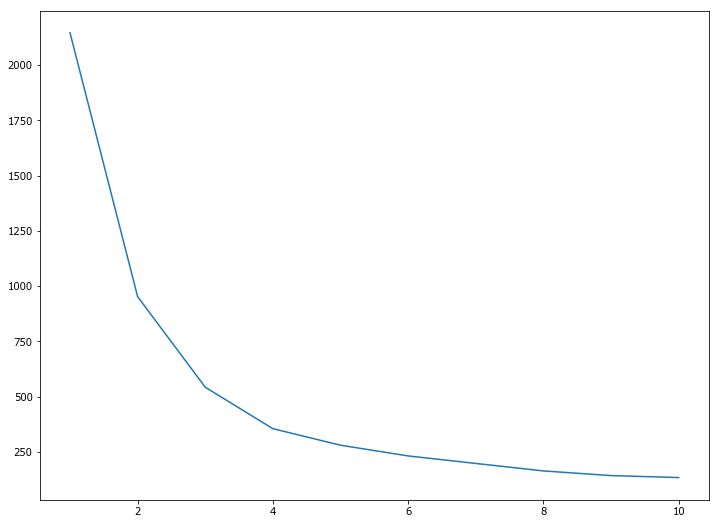

In [36]:
plt.subplots(1, figsize=(12, 9))
plt.plot(ks, k_inertia)

In [37]:
diff = np.diff(k_inertia)

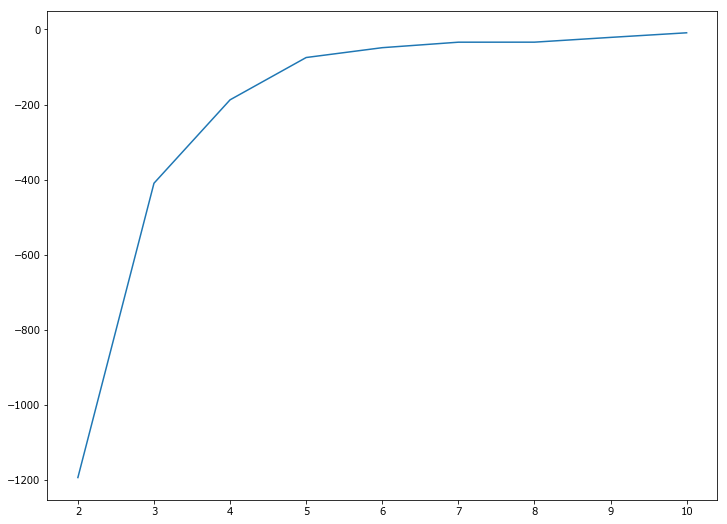

In [38]:
plt.subplots(1, figsize=(12, 9))
plt.plot(ks[1:], diff)

In [39]:
diff_r = diff[1:] / diff[:-1]

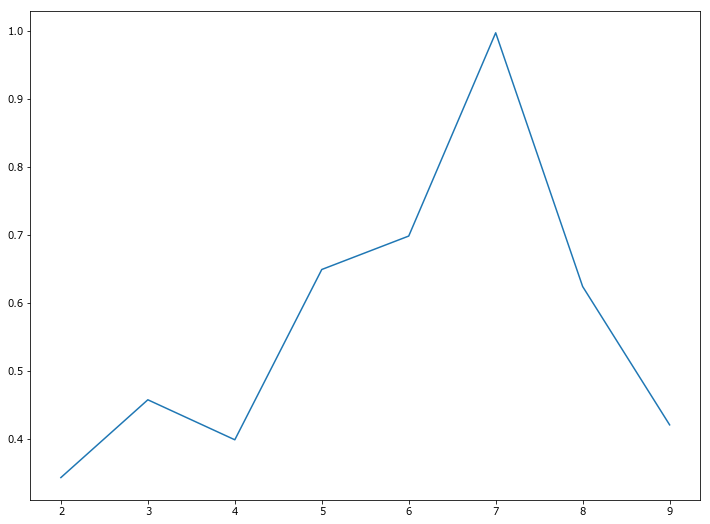

In [40]:
plt.subplots(1, figsize=(12, 9))
plt.plot(ks[1:-1], diff_r)

In [41]:
k_opt = ks[np.argmin(diff_r)+1]
k_opt

2

In [42]:
epsilon = .1
num = 3

In [43]:
model = DBSCAN(eps=epsilon, min_samples=num, algorithm='ball_tree', n_jobs = 1)

In [44]:
clusters_dbscan = model.fit_predict(np.array(x_yes).reshape(-1,1))

In [45]:
clusters_dbscan

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

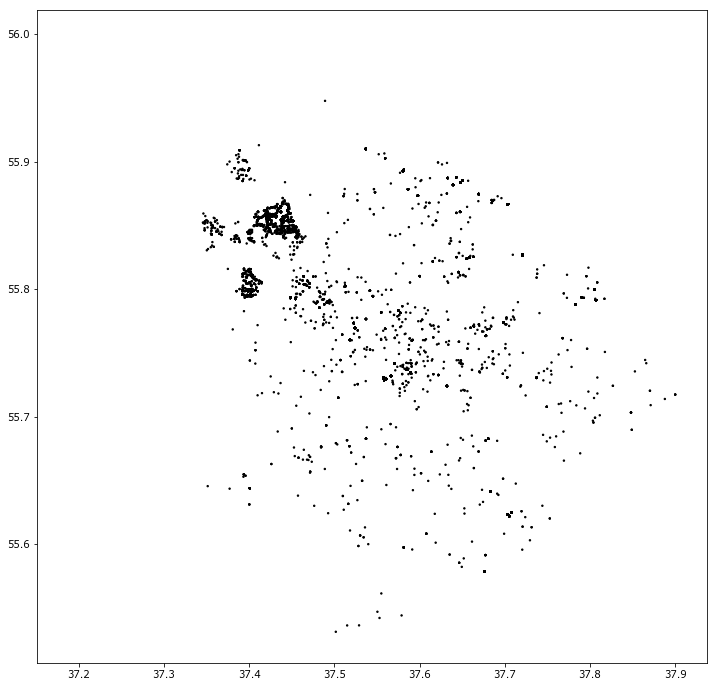

In [50]:
plt.subplots(1, figsize=(12, 12))
plt.scatter(x_yes, y_yes, c=clusters_dbscan, cmap='gray', s=2)